<h1><center>Box Plot</center></h1><br />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
from matplotlib.dates import DateFormatter, MonthLocator, DayLocator
import seaborn as sns
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import fill
from matplotlib.ticker import FormatStrFormatter
from operator import add
# could also use holoview: http://holoviews.org/

In [2]:
list_csv_file = []
for i in range(90, 120):
    list_csv_file.append("Results_model_run%s.csv" % i)
list_dataframe = []
for filename in list_csv_file:
    list_dataframe.append(pd.read_csv(filename))
merged_dataframes = pd.concat(list_dataframe)
merged_dataframes['Repaired eol PV modules'] = (merged_dataframes['eol - new repaired weight'] + 
                                 merged_dataframes['eol - used repaired weight']) / 1E9
merged_dataframes['Sold eol PV modules'] = (merged_dataframes['eol - new sold weight'] + 
                                 merged_dataframes['eol - used sold weight']) / 1E9
merged_dataframes['Recycled eol PV modules'] = (merged_dataframes['eol - new recycled weight'] + 
                                 merged_dataframes['eol - used recycled weight']) / 1E9
merged_dataframes['Landfilled eol PV modules'] = (merged_dataframes['eol - new landfilled weight'] + 
                                 merged_dataframes['eol - used landfilled weight']) / 1E9
merged_dataframes['Stored eol PV modules'] = (merged_dataframes['eol - new stored weight'] + 
                                 merged_dataframes['eol - used stored weight']) / 1E9
merged_dataframes['Total waste'] = (
    merged_dataframes['Repaired eol PV modules'] + merged_dataframes['Sold eol PV modules'] + 
    merged_dataframes['Recycled eol PV modules'] + merged_dataframes['Landfilled eol PV modules'] + 
    merged_dataframes['Stored eol PV modules'])
merged_dataframes['New product'] = merged_dataframes['New product'] / 1E9
merged_dataframes['Used product'] = merged_dataframes['Used product'] / 1E9
merged_dataframes = merged_dataframes.loc[merged_dataframes['Year'] == 2050]
merged_dataframes.to_csv("MergedData.csv")

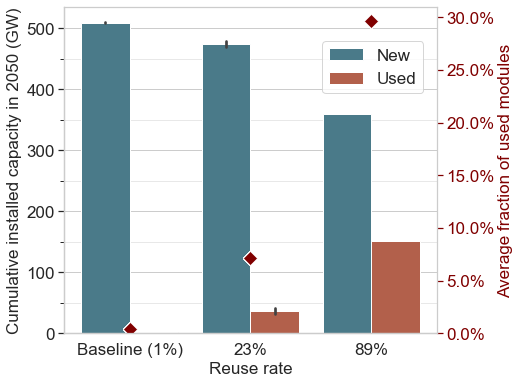

In [13]:
data_in = pd.read_csv("DataHistogram_used-new.csv")
data_in['Average fraction of used modules'] *= 100 
sns.set(style="whitegrid", color_codes=True)
from pylab import rcParams
import matplotlib.ticker as mtick
from  matplotlib.ticker import PercentFormatter
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.rc('axes', labelsize=17)
rcParams['figure.figsize'] = 5, 5
g = sns.catplot(x="Reuse rate", y="Cumulative installed capacity in 2050 (GW)", hue='PV modules type', 
                kind="bar", height=5.5, aspect=1.15, data=data_in, legend=False, 
                palette=[sns.diverging_palette(220, 20, n=7)[0], sns.diverging_palette(220, 20, n=7)[-1]])
plt.legend(loc='upper left', bbox_to_anchor=(0.67, 0.92), ncol=1, fontsize=17)
ax2 = plt.twinx()
sns.scatterplot(x="Reuse rate", y="Average fraction of used modules",
                data=data_in, color='maroon', marker="D", s=100)
ax2.grid(False)
ax2.yaxis.label.set_color('maroon')
ax2.tick_params(axis='y', colors='maroon')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax.set_ylabel('')
#for ax in g.axes.flat:
 #   ax.yaxis.set_major_formatter(mtick.PercentFormatter())
import matplotlib as mpl
for ax in g.axes.flat:
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(2))
    ax.grid(b=True, which='minor', color='lightgrey', linewidth=0.5)
    ax2.set_ylim(0, 31)
plt.savefig("figure10.2.png", bbox_inches='tight', figsize=(5.5, 3.5), dpi=500)